## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
df_raw = pd.merge(mouse_metadata, study_results, how = 'inner', on='Mouse ID')

# Check data quality
df_raw.isnull().sum()

# Display the data table for preview
df_raw.head(50)
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.
mice_count = pd.DataFrame(df_raw.groupby(['Mouse ID', 'Timepoint']).count())
mice_count['Tumor Volume (mm3)']
df_raw['Mouse ID'].value_counts()

g989    13
c757    10
m550    10
z578    10
a444    10
        ..
x226     1
l872     1
n482     1
b447     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
doppelganger = pd.DataFrame(mice_count[mice_count['Tumor Volume (mm3)'] > 1])
doppelganger.index

MultiIndex([('g989',  0),
            ('g989',  5),
            ('g989', 10),
            ('g989', 15),
            ('g989', 20)],
           names=['Mouse ID', 'Timepoint'])

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
doppelganger.reset_index(inplace = True)
doppelganger

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,g989,0,2,2,2,2,2,2
1,g989,5,2,2,2,2,2,2
2,g989,10,2,2,2,2,2,2
3,g989,15,2,2,2,2,2,2
4,g989,20,2,2,2,2,2,2


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = pd.DataFrame(df_raw[df_raw['Mouse ID'] != doppelganger['Mouse ID'][0]])
df_clean['Mouse ID'].value_counts()

l725    10
j365    10
c282    10
a644    10
a411    10
        ..
x336     1
d133     1
v199     1
t573     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
df_clean[df_clean['Mouse ID'] == doppelganger['Mouse ID'][0]]
df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = df_clean.groupby('Drug Regimen').mean()
drug_median = df_clean.groupby('Drug Regimen').median()
drug_var = df_clean.groupby('Drug Regimen').var()
drug_std = df_clean.groupby('Drug Regimen').std()
drug_sem = df_clean.groupby('Drug Regimen').sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug = pd.DataFrame({'mean': drug_mean['Tumor Volume (mm3)'], 'median': drug_median['Tumor Volume (mm3)'], 'var': drug_var['Tumor Volume (mm3)'], 'std': drug_std['Tumor Volume (mm3)'], 'sem': drug_sem['Tumor Volume (mm3)'] })
drug


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
df_statistic = df_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
df_statistic

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

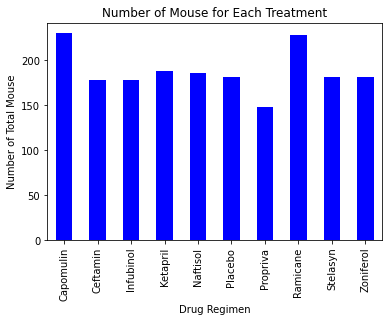

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_count = pd.DataFrame(df_clean.groupby('Drug Regimen').count())

drug_count['Mouse ID'].plot(kind="bar", facecolor="b")
plt.title("Number of Mouse for Each Treatment")
plt.ylabel("Number of Total Mouse")
plt.xlabel("Drug Regimen")


Text(0.5, 0, 'Drug Regimen')

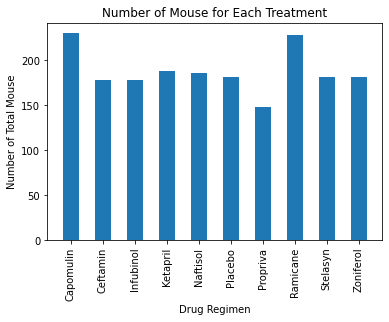

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_count
x_axis = np.arange(len(drug_count))

# Create the ticks for our bar chart's x axis
drugs = [value for value in drug_count.index]
x_axis = np.arange(len(drugs))

plt.bar(x_axis, drug_count['Mouse ID'],align='center', width = 0.5)
plt.xticks(x_axis, drugs, rotation='vertical')
plt.title("Number of Mouse for Each Treatment")
plt.ylabel("Number of Total Mouse")
plt.xlabel("Drug Regimen")

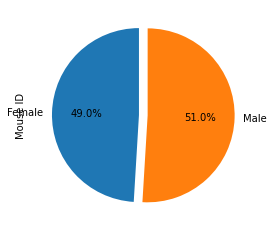

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = pd.DataFrame(df_clean.groupby('Sex').count())
explode=(0,0.1)
gender['Mouse ID'].plot(kind="pie", explode=explode,
autopct="%1.1f%%", shadow=None, startangle=90)

([<matplotlib.patches.Wedge at 0x1f2c1cf8b80>,
 [Text(-1.0995024239828841, 0.03308201408261592, 'Female'),
  Text(1.1994571897995099, -0.03608946990830789, 'Male')],
 [Text(-0.5997285948997548, 0.018044734954154134, '49.0%'),
  Text(0.6996833607163808, -0.021052190779846266, '51.0%')])

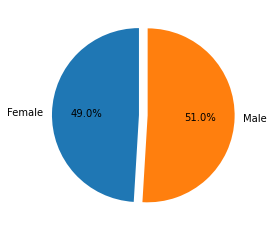

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = [value for value in gender.index]
plt.pie(gender['Mouse ID'], explode=explode, labels=sex,
        autopct="%1.1f%%", shadow=None, startangle=90)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_clean_drug = df_clean[(df_clean['Drug Regimen'] == 'Capomulin') | (df_clean['Drug Regimen'] == 'Ramicane') | (df_clean['Drug Regimen'] == 'Infubinol') | (df_clean['Drug Regimen'] == 'Ceftamin')]
df_clean_drug

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

df_clean_timepoint = df_clean_drug.sort_values(by=["Mouse ID", 'Timepoint']).drop_duplicates(subset=["Mouse ID"], keep="last")
df_clean_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [15]:
# Check if the new dataset is correct
df_clean_timepoint[df_clean_timepoint['Drug Regimen'] == 'Infubinol'].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
530,a577,Infubinol,Female,6,25,30,57.031862,2
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
grouped_regimen = df_clean_timepoint.groupby('Drug Regimen').count()
treatments = [drug for drug in grouped_regimen.index]
treatments
# Create empty list to fill with tumor vol data (for plotting)
tumor={}
lowerq, upperq, IQR, lower_bound, upper_bound={}, {}, {},{},{}
TumorVol = pd.DataFrame()

for treatment in treatments:
    tumor[f'{treatment}'],lowerq[f'{treatment}'], upperq[f'{treatment}'],IQR[f'{treatment}'], lower_bound[f'{treatment}'], upper_bound[f'{treatment}'] =[], [], [], [], [], []
    temp = pd.DataFrame(df_clean_timepoint[df_clean_timepoint['Drug Regimen'] == f'{treatment}']['Tumor Volume (mm3)'])
    temp = temp.reset_index()
    temp_df = pd.DataFrame({'Tumor Volume (mm3)': temp['Tumor Volume (mm3)']})
    tumor[f'{treatment}'] = temp_df['Tumor Volume (mm3)']

    # # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    lowerq[f'{treatment}'].append(temp_df['Tumor Volume (mm3)'].quantile(.25))
    upperq[f'{treatment}'].append(temp_df['Tumor Volume (mm3)'].quantile(.75))
    IQR[f'{treatment}'].append(upperq[f'{treatment}'][0] - lowerq[f'{treatment}'][0])
    lower_bound[f'{treatment}'].append(lowerq[f'{treatment}'][0] - (1.5*IQR[f'{treatment}'][0]))
    upper_bound[f'{treatment}'].append(upperq[f'{treatment}'][0] + (1.5*IQR[f'{treatment}'][0]))
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
tumor_df = pd.DataFrame(tumor)
tumor_df

Values below {'Capomulin': [20.70456164999999], 'Ceftamin': [25.355449580000002], 'Infubinol': [36.83290494999999], 'Ramicane': [17.912664470000003]} could be outliers.
Values above {'Capomulin': [51.83201549], 'Ceftamin': [87.66645829999999], 'Infubinol': [82.74144559000001], 'Ramicane': [54.30681135]} could be outliers.


,Capomulin,Ceftamin,Infubinol,Ramicane
0,38.982878,62.999356,67.973419,38.407618
1,38.939633,45.000000,65.525743,43.047543
2,30.485985,56.057749,57.031862,38.810366
3,37.074024,55.742829,66.083066,32.978522
4,40.159220,48.722078,72.226731,38.342008
5,47.685963,47.784682,36.321346,33.397653
6,37.311846,61.849023,60.969711,37.311236
7,38.125164,68.923185,62.435404,40.659006
8,38.753265,67.748662,60.918767,29.128472
9,41.483008,57.918381,67.289621,33.562402


In [17]:
# Check for outliers
tumor_df[(tumor_df[f'Infubinol'] < lower_bound[f'Infubinol'][0])]
# one of the data for Infubinol is lower than the lower bound

min(tumor_df['Infubinol'])

36.321345799999996

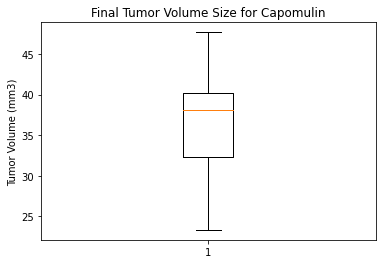

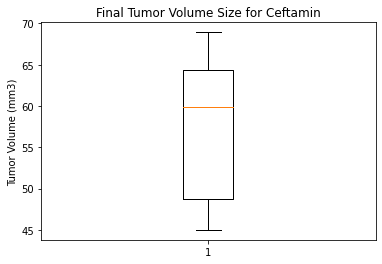

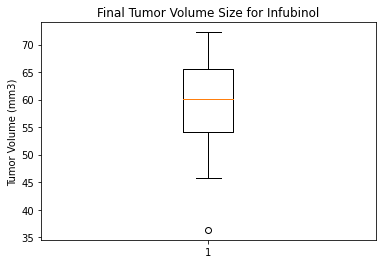

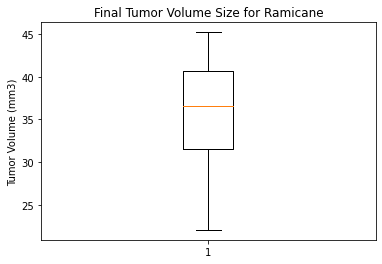

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

for treatment in treatments:
    plt.boxplot(tumor_df[f'{treatment}'])
    plt.title(f'Final Tumor Volume Size for {treatment}')
    plt.ylabel(f'Tumor Volume (mm3)')
    plt.show()

## Line and Scatter Plots

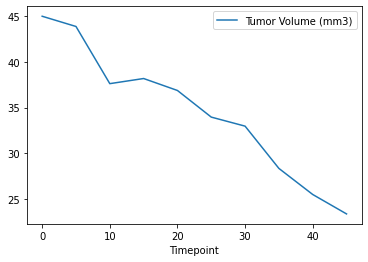

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Select Mouse ID
Mouse_ID = 's185'
df_line_raw = df_clean[(df_clean['Drug Regimen'] == 'Capomulin') &
 (df_clean['Mouse ID'] == Mouse_ID)]
df_line_clean = df_line_raw[{'Timepoint', 'Tumor Volume (mm3)'}]
df_line_clean.set_index('Timepoint', inplace = True)
df_line_clean.plot(kind = 'line')

Text(0, 0.5, 'Avg Tumor Volume (mm3)')

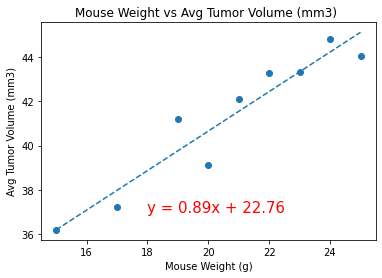

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_scatter_raw = df_clean[df_clean['Drug Regimen'] == 'Capomulin']
df_scatter_clean = df_scatter_raw[{'Weight (g)','Tumor Volume (mm3)'}]
df_scatter_clean_pl = df_scatter_clean.groupby('Weight (g)').mean()
df_scatter_clean_pl
# Calculate the regression parameters
df_scatter_clean_pl.reset_index(inplace = True)

# Create equation of line to calculate predicted tumor volume (mm3) based on the mouse weight (g)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(df_scatter_clean_pl['Weight (g)'], df_scatter_clean_pl['Tumor Volume (mm3)'])
vc_fit = vc_slope * df_scatter_clean_pl['Weight (g)'] + vc_int
# Create equation of line to calculate predicted tumor volume (mm3) based on the mouse weight (g)
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

plt.plot(df_scatter_clean_pl['Weight (g)'],vc_fit,"--")
plt.scatter(df_scatter_clean_pl['Weight (g)'], df_scatter_clean_pl['Tumor Volume (mm3)'])
plt.annotate(line_eq,(18,37),fontsize=15,color="red")
plt.title('Mouse Weight vs Avg Tumor Volume (mm3) ')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
df_scatter_clean_pl.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.950524
Tumor Volume (mm3),0.950524,1.000000
